# Boston Housing Price Prediction

Created by: David Chia  
Source of dataset: [UCI repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

## Pre-analysis

Before I start diving into the data, I want to first go through process of thinking about the problem and how it can be tackled logically (what kind of problem it is, what kind of data we need). Then only look at the information available, and decide how best can we proceed.

Problem statement: Predict housing prices in Boston

Factors that I could think of that would affect housing prices - size of house, size of compound, age of house, location, accessibility, safety, facilities around (is there a school, hospital, police station nearby)

Nature of problem: It will be a regression problem. The predictor should have kind of a normal distribution.

## References

- https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Read in data

Data columns from description file:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000  
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's


In [2]:
# columns obtained from data description file
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df_raw = pd.read_csv('data/data.csv', header=None, sep='\s+')
df_raw.columns = columns

# target = df_raw['MEDV']
# features = df_raw.drop('MEDV', axis=1)

print('No. of rows and columns:', df_raw.shape)
df_raw.head()

No. of rows and columns: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory data analysis

## Plan

- look at predictor variable (think about what I would expect first)
- then look at the information available (and think about if they are relevant, and what relationship I would expect)
- then take a deeper look into the data - first do univariate analysis to check their distribution, fix them,
then check if they have relationship with predictor variable

In [3]:
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

506
Skewness: 1.108098
Kurtosis: 1.495197


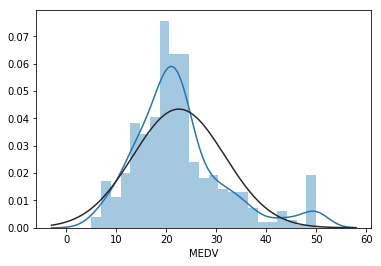

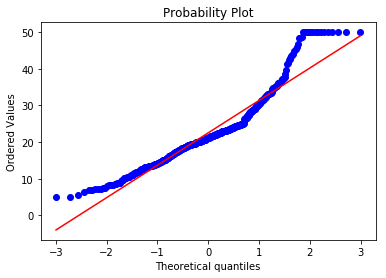

In [4]:
# check how many data points do I have
df_f = df_raw[pd.notnull(df_raw['MEDV'])] 
print(len(df_f))

target = df_f['MEDV']

# look at how these data is distributed - histogram
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

After first pass, it appears that the median sales prices have a skewed normal distribution, that is more peaked than normal.
There also appears to be high number of outliers at around MEDV of 50, which is what I will investigate next.

In [5]:
df_raw.sort_values(by='MEDV', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1,0.6310,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0,0.6310,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1,0.6680,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0


There are 16 values with MEDV of exactly 50.0, which is a little odd. It could be a coincidence or it could that data was not inputted correctly (or value of 50.0 was used when MEDV is unknown).

To verify this, I will run a bivariate analysis of all data, data without the 50s, and data with just the 50s. I will do this by plotting salesprice against all features.

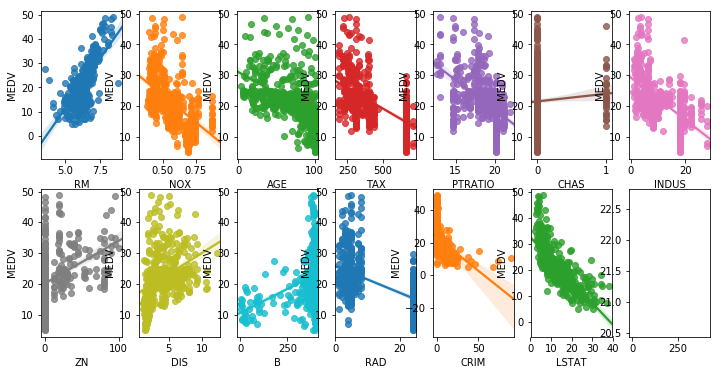

In [6]:
feature_cols = set(df_raw.columns) - set(['MEDV'])

df = df_raw[df_raw['MEDV'] != 50]

#scatterplot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))

for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='MEDV', data=df, ax=axs[int(i/7), i%7])


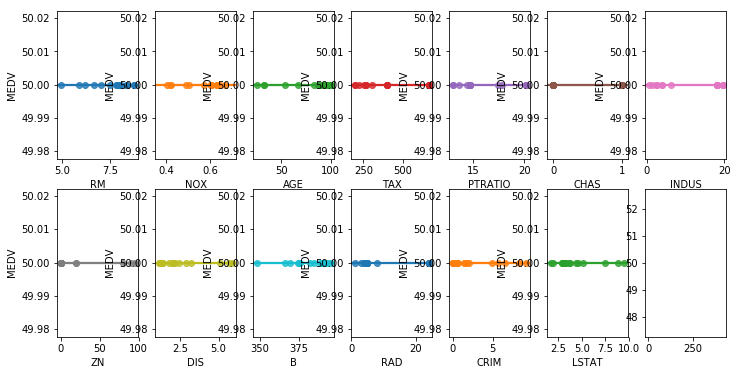

In [7]:
df = df_raw[df_raw['MEDV'] == 50]

#scatterplot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))

for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='MEDV', data=df, ax=axs[int(i/7), i%7])


For data filtered for only MEDV = 50, t appears that values of features are randomly distributed at MEDV = 50, for all features. None of them bear resemblance to the relationships seen in the data filtered for MEDV != 50.

This suggests that MEDV = 50 could have been an input error or just a placeholder value. Regardless, it should be excluded from the analysis.

So now we will exclude it and repeat our exploration of our target variable MEDV.

490
Skewness: 0.775660
Kurtosis: 1.049637


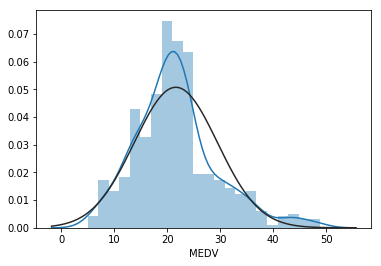

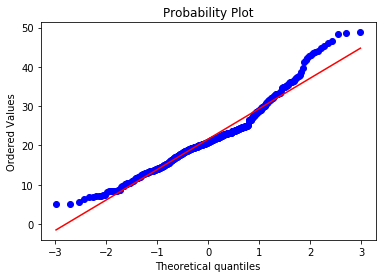

In [8]:
# check how many data points do I have
df_f = df_raw[df_raw['MEDV'] != 50] 
print(len(df_f))

target = df_f['MEDV']

# look at how these data is distributed - histogram
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

After removal of the data points with MEDV = 50, the target variable is 'smoother', though it suffers from heavy tails.

KIV: Should transformation be applied to the target variable in this case?

Skewness: -0.585281
Kurtosis: 0.994297


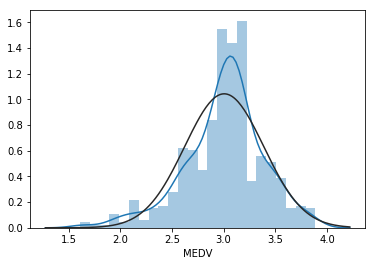

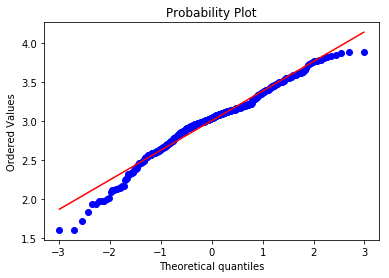

In [9]:
# transform data 
target_log = np.log(target)

# look at how these data is distributed - histogram
sns.distplot(target_log, fit=norm)
fig = plt.figure()
res = stats.probplot(target_log, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target_log.skew())
print("Kurtosis: %f" % target_log.kurt())



### Features analysis

Now that we have looked at our target variable, it's time to look at the features available.

First let's look at the features, and think about what is the expected distribution of the features, and what is the expected relationship with target variable, as well as expected relationships among the features.

Data columns from description file:
    
CRIM - per capita crime rate by town  
- shape of data is highly dependent on where it's sourced from, whether it is spread across houses in towns with different crime rates or concentrated in just a few
- I would expect it to have a inverse linear or inverse sigmoid relationship.

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- TODO: clarify what this is. Spent 5mins doing quick search online but couldn't figure it out.  

INDUS - proportion of non-retail business acres per town
- Non-retail businesses would mean factories or warehouses, which are typically located further out from central, with cheaper land. So I would think that this have an inverse relationship with house price.

CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- This may be good or bad. I would think it's a good thing to be close to the river, to be able to walk or jog along it.

NOX - nitric oxides concentration (parts per 10 million)
- Nitric oxide is a pollutant, I would expect inverse relationship. And probably inverse sigmoid relationship. Because beyond a certain level of nitric oxide, the area will be inhabitable.

RM - average number of rooms per dwelling
- This should be proportional to house pricing. I expect a positive linear relationship.

AGE - proportion of owner-occupied units built prior to 1940
- the newer the better, tho old antique houses may fetch high price. But i think those would be more of an exception on the grand scheme of things.

DIS - weighted distances to five Boston employment centres
- inverse relationship
- the shorter the distance the better, hence able to command higher price. Although the rich may not care about this factor. So we might see high prices with large distance too.

RAD - index of accessibility to radial highways
- positive relationship, the more accessible the better

TAX - full-value property-tax rate per $10,000
- positive relationship

PTRATIO - pupil-teacher ratio by town
- Lower PT ratio means each pupil gets more teacher attention. Hence, we expect lower PT ratio to correspond to education quality, which has positive correlation.

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- in general there Black population tend to have lower income (back this up), so I would expect an inverse relationship)

LSTAT - % lower status of the population
- the lower the status, the lower the income, and hence the lower the house price they can afford

MEDV - Median value of owner-occupied homes in $1000's

Initial thoughts - We only have very limited set of features to work with. 

It covers security, accessibility of transport, tax, education quality, demographics (black and lower status), employment accessibility, air quality

What I think have positive relationship: PTRATIO, TAX, RM, CHAS
Negative relationship: B, LSTAT, AGE, NOX, CRIM, INDUS
Not much impact: RAD, DIS, 
Unsure: ZN

We don't know key information about the houses - its size, no. of floors etc. Also, we don't know about whether it has schools or other conveniences nearby. Nothing about public transport

plan:
- univariate analysis to look at distributions
- bivariate analysis to investigate relationships
- feature selection
- processing - missing values & outliers
- feature engineering - create dummy and derivative variables

#### Investigate variable types and get quick sense of missing values

In [10]:
df = df_raw.copy()

se_missing = df.isnull().sum()/len(df)
# miss = missing_vector[missing_vector > 0]
se_missing.sort_values(inplace=True)
se_missing

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


Quick note: There is no missing value, and all variables are numerical.

#### Univariate analysis

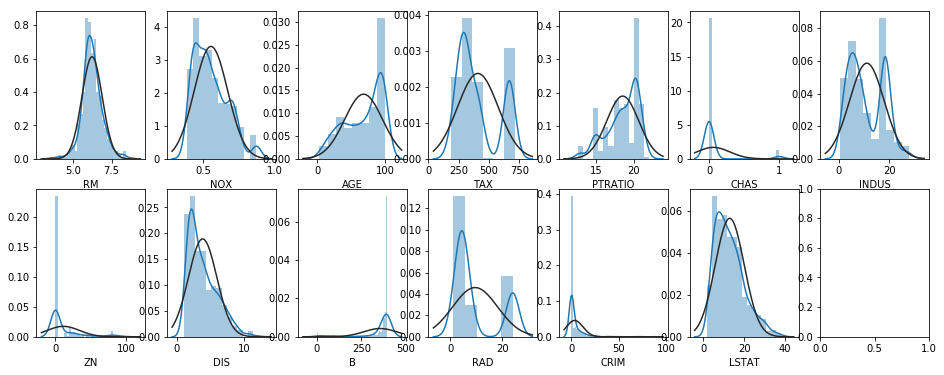

In [12]:
df = df_raw[
    df_raw['MEDV'] != 50
]

feature_cols = set(df_raw.columns) - set(['MEDV'])

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 6))

for i, f in enumerate(feature_cols):
    sns.distplot(df[f], fit=norm, ax=axs[int(i/7), i%7])

quick observations: 
- There are continuous and categorical variables
- most variables are not normally distributed

#### Bivariate analysis

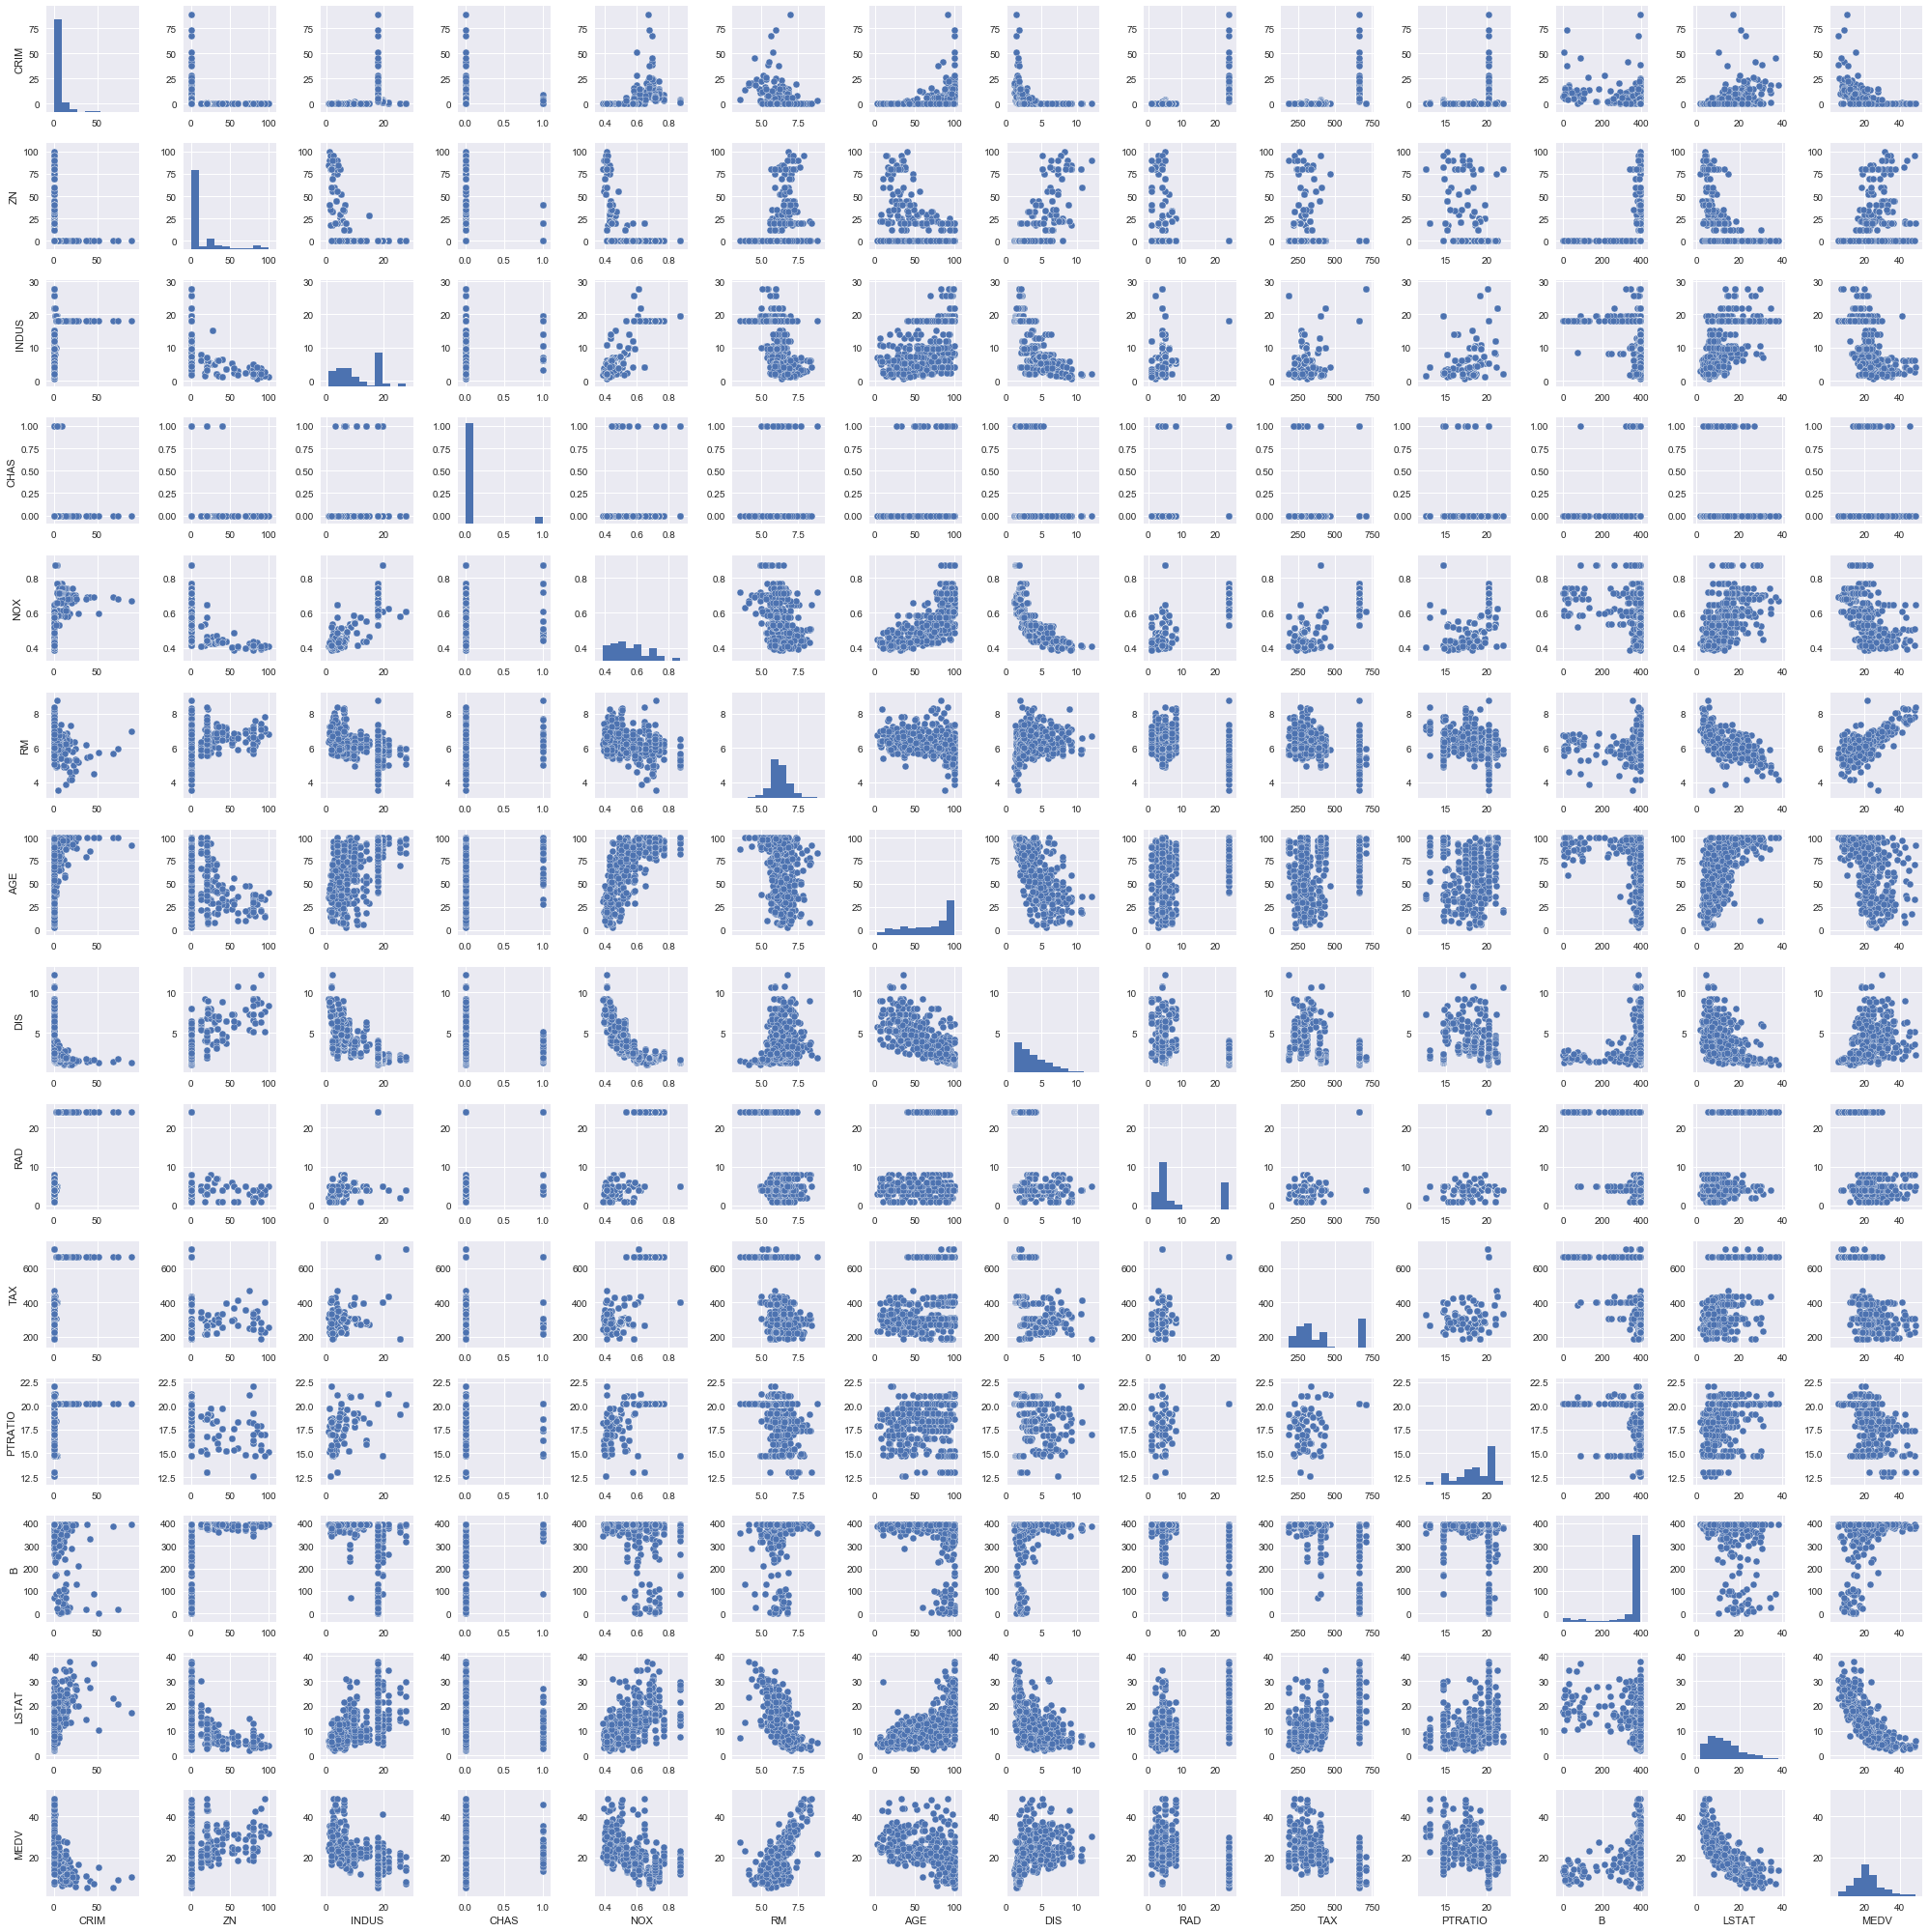

In [13]:
#scatterplot
df = df_raw[
    df_raw['MEDV'] != 50
]

sns.set()
sns.pairplot(df, size = 2)
plt.show();

Looking at the last row, it appears that some variables have no useful relationship against MEDV. Let's verify that by looking at correlation matrix.

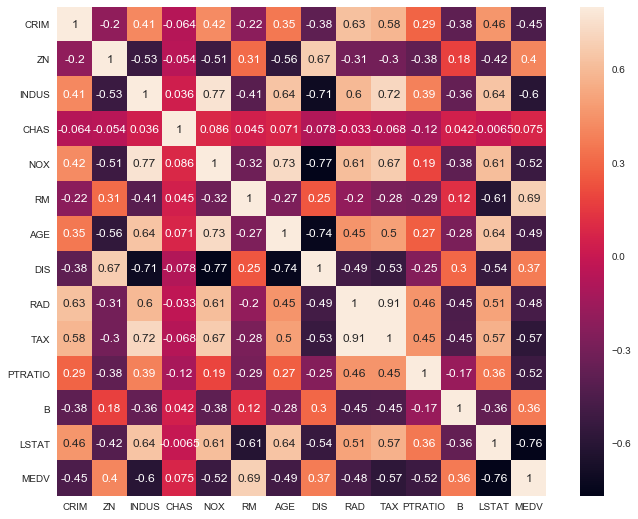

In [14]:
#correlation matrix

df = df_raw[df_raw['MEDV'] != 50]
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Looking at the last row, it's apparent that CHAS has little correlation with MEDV. While CRIM, ZN, AGE, DIS, RAD, B have less than abs(0.5) correlation.

I will exclude CHAS for the first pass of feature selection. I will compare the model without CHAS with another model without the other poorly correlated variables.

Next I will move on to feature pre-processing (scaling) and engineering.

### Feature pre-processing

There are no categorical variables, hence I will only need to handle pre-processing of numerical variables.

Pre-processing steps for numerical variables: 
- remove skewness (only applicable to normally distributed variables?)
- standardise (only applicable to normally distributed variables?)

At the moment, it's still unclear if I should standardise or normalise:
I am going to follow the suggestion: 
- In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation. http://scikit-learn.org/stable/modules/preprocessing.html


In [15]:
# exclude data points with MEDV = 50, as we found it likely to be erroneous value
df = df_raw[
    df_raw['MEDV'] != 50
]

# exclude MEDV which is the target variable, and CHAS which has low correlation with MEDV
feature_cols = list(set(df.columns) - set(['MEDV', 'CHAS']))
print(len(feature_cols), 'features -', feature_cols)

12 features - ['RM', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'INDUS', 'ZN', 'DIS', 'B', 'RAD', 'CRIM', 'LSTAT']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_cols], df['MEDV'], test_size=0.25, random_state=25
)

print('No. of training data:', len(X_train))
print('No. of test data:', len(X_test))

No. of training data: 367
No. of test data: 123


Using standard scaling (minus mean then subtract by std) didn't seem to work, so I am going to use 0-1 scaling instead.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)

for i, col in enumerate(feature_cols):
    X_train[col] = scaled[:,i]


scaled_test = scaler.transform(X_test)

for i, col in enumerate(feature_cols):
    X_test[col] = scaled_test[:,i]

In [19]:
X_test.head()

,RM,NOX,AGE,TAX,PTRATIO,INDUS,ZN,DIS,B,RAD,CRIM,LSTAT
474,0.385776,0.409465,0.952626,0.914122,0.808511,0.642963,0.00,0.114643,0.888244,1.000000,0.090474,0.461714
115,0.489353,0.333333,0.878476,0.467557,0.553191,0.343333,0.00,0.117683,0.868904,0.217391,0.001855,0.393714
473,0.706843,0.471193,0.666323,0.914122,0.808511,0.642963,0.00,0.124056,0.943971,1.000000,0.052159,0.276571
251,0.594790,0.094650,0.061792,0.272901,0.691489,0.189630,0.22,0.568146,0.949997,0.260870,0.002335,0.046000
359,0.527393,0.792181,0.807415,0.914122,0.808511,0.642963,0.00,0.121883,0.984467,1.000000,0.047825,0.305429


# Train models

- set up train_evaluate_model
- run thru the existing 3 models
- research other possible models

In [97]:
# define models

from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

lr_regr = LinearRegression()
xg_regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)
ls_regr = Lasso(alpha=0.00099, max_iter=5000)
dt_regr = DecisionTreeRegressor(max_depth=5)

In [100]:
# evaluate each model in turn

from sklearn import model_selection
import math

models = [
    ('LR', lr_regr),
    ('XGBoost', xg_regr),
    ('Lasso', ls_regr),
    ('Decision Tree', dt_regr)
]

results = []
names = []

In [101]:
print("Root Mean Square Error (RMSE) score\n")
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=6)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    sqrt_cv_results = [math.sqrt(abs(i)) for i in cv_results]
    msg = "%s: %f (%f)" % (name, np.mean(sqrt_cv_results), np.std(sqrt_cv_results))
    print(msg)
    print(sqrt_cv_results)
    print()

Root Mean Square Error (RMSE) score

LR: 3.902146 (0.813401)
[3.8651263054627814, 4.947329835356172, 3.51823936254433, 4.814541691845651, 3.973206312704725, 2.9710983713859678, 5.1519556394083645, 2.672353835181639, 3.9742750029820715, 3.133332147345855]

XGBoost: 2.801880 (0.459520)
[2.804437909661946, 3.0885975023556678, 2.3193808461289183, 3.080980020765456, 2.792919757762845, 2.0526763655611564, 3.5548762482591503, 2.197900809578482, 2.8530590428318527, 3.273967978267697]

Lasso: 3.903231 (0.812800)
[3.8738750095080525, 4.945110210808856, 3.5250178951321574, 4.805710459609939, 3.9752053313887155, 2.9663231632348066, 5.1587731935716485, 2.676304914631917, 3.972815344079163, 3.1331728120399487]

Decision Tree: 3.580287 (0.793783)
[2.52998925606123, 3.5609165817532786, 3.3072924796805974, 4.777912155847988, 4.447481957927077, 3.138697770762527, 4.393100720165257, 2.7663738213202884, 2.610076753753633, 4.271024241753518]



In [102]:
print("\nR-squared value\n")
scoring = 'r2'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=6)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(cv_results)
    print()    


R-squared value

LR: 0.739594 (0.112607)
[ 0.76154577  0.51487241  0.8608696   0.6661621   0.71564012  0.80453037
  0.74225058  0.89211291  0.60319403  0.83476472]

XGBoost: 0.867381 (0.046014)
[ 0.8744637   0.8109238   0.93953342  0.86328899  0.85949137  0.90669902
  0.87728365  0.92702103  0.79550444  0.81959907]

Lasso: 0.739563 (0.112327)
[ 0.76046506  0.51530762  0.86033296  0.66738568  0.71535391  0.80515819
  0.74156798  0.89179365  0.60348545  0.83478152]

Decision Tree: 0.784106 (0.095814)
[ 0.89783197  0.74867375  0.90446861  0.6296822   0.64370111  0.80298905
  0.82084285  0.87102965  0.82885314  0.69298897]



# Make predictions on test dataset

After conducting k-fold cross validation, XGBoost is identified as the best model. It will be used for final training and testing.

RMSE score: 3.29281216392
R2 score: 0.743776109053


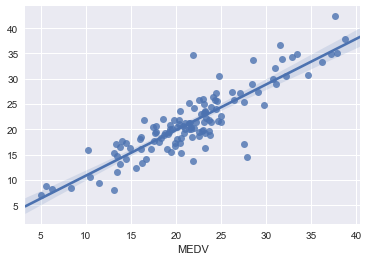

In [96]:
from sklearn.metrics import mean_squared_error

# train model using X_train and y_train, and make predictions on X_test
model = xgb_regr
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
sns.regplot(y_test, y_pred)

# Archive

# Train models

In [20]:

def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [65]:
from sklearn.metrics import r2_score
def train_model(regressor, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model = regressor.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    rmse_score = rmse(y_test, y_pred)
    rsquared_score = r2_score(y_test, y_pred)
    
    sns.regplot(y_test, y_pred)
    
    print('RMSE score:', rmse_score)
    print('R2 score:', rsquared_score)
    
    return model

In [22]:
df = df_raw[
    df_raw['MEDV'] != 50
]

df['MEDV'].std()

7.8653010629802589

In [ ]:
# list of selected features - DIS is removed here due to its high correlation with multiple other features
selected_cols = ['RM', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'INDUS', 'ZN','B', 'RAD',
       'CRIM', 'LSTAT']

## Linear Regression

RMSE score: 3.61658210533
R2 score: 0.690911842722


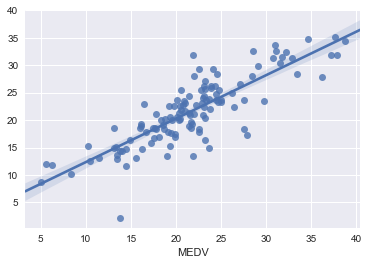

In [66]:
from sklearn.linear_model import LinearRegression
m = train_model(LinearRegression())

RMSE score: 3.87002757977
R2 score: 0.646072892142


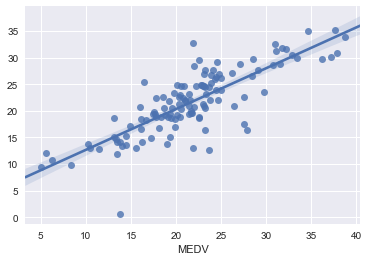

In [67]:
m = train_model(LinearRegression(), X_train = X_train[selected_cols], X_test = X_test[selected_cols])

## XGBoost

RMSE score: 3.29281216392
R2 score: 0.743776109053


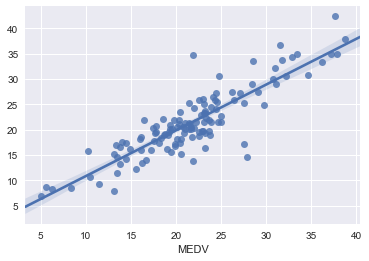

In [69]:
import xgboost as xgb
xgb_regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

train_model(xgb_regr);

RMSE score: 3.2491095666
R2 score: 0.750532243751


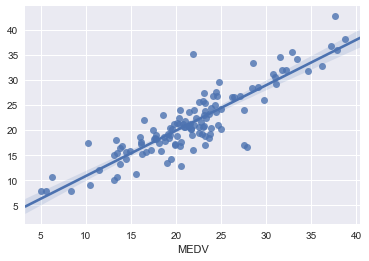

In [71]:
train_model(xgb_regr, X_train = X_train[selected_cols], X_test = X_test[selected_cols]);

## Lasso

RMSE score: 3.62045691826
R2 score: 0.690249172643


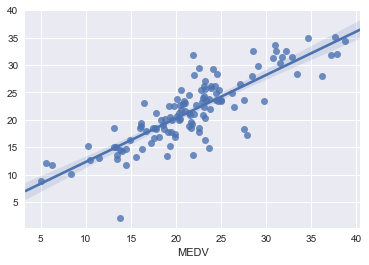

In [73]:
from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099
lasso_regr = Lasso(alpha=best_alpha, max_iter=5000)

train_model(lasso_regr);

RMSE score: 3.87318099809
R2 score: 0.645495875617


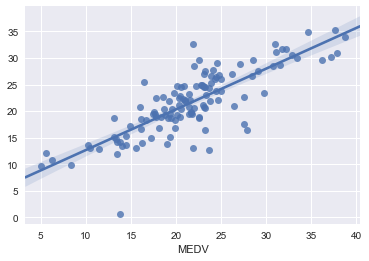

In [74]:
train_model(lasso_regr, X_train = X_train[selected_cols], X_test = X_test[selected_cols]);

what i learned
- different preprocessing - standardise
- how to train and validate models using cross_val_score and kfold to make it easy to train models k times and get result for each of them

to read
- more on standardise vs normalise
- generalised linear models


to do:
- transform pred variable
- try different models